### CIFAR-100 dataset. The dataset consists of 50,000 32x32 RGB (red, green, and blue) training images, labelled over 100 categories, as well as 10,000 test images.
Write code that uses the Keras library to build, train, and test a CNN with the architecture described.

In [1]:
## import libraries

import pandas as pd
import livelossplot
import keras
from keras import Sequential, datasets
import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from livelossplot import PlotLossesKeras
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
# Download the Dataset
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [14]:
# Reshaping the images
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [15]:
# Encode the target labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

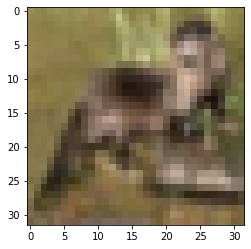

In [16]:
## plot an image 
plt.imshow(x_train[100])

In [17]:
# Buil CNN
# Initializing the CNN
classifier = Sequential()

# IP layer: 2D Convolution Layer
classifier.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu')) # shape matches the image size we loaded

#A 2D convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# A 2D Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add a dropout layer
classifier.add(Dropout(0.25))

# Adding 2 2D convolutional layers
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))

# A 2D Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add a dropout layer
classifier.add(Dropout(0.25))

# Flattening layer
classifier.add(Flatten())

# Fully connected dense layer
classifier.add(Dense(units = 512, activation = 'relu'))

# Add a dropout layer
classifier.add(Dropout(0.5))

# Output layer (one node for binary models, use softmax for multi-class models)
classifier.add(Dense(units = 100, activation = 'softmax'))

In [18]:
## Choosing hyper parameters
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

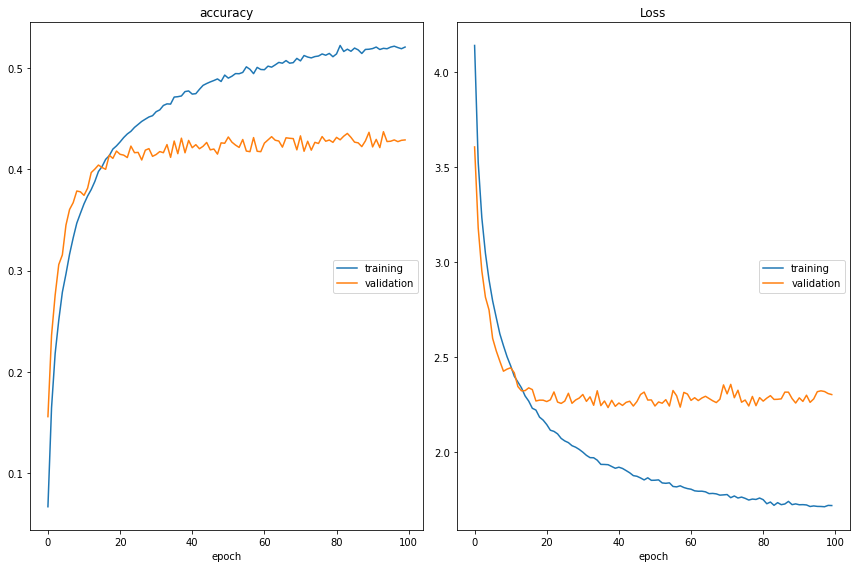

accuracy
	training         	 (min:    0.067, max:    0.522, cur:    0.521)
	validation       	 (min:    0.156, max:    0.437, cur:    0.429)
Loss
	training         	 (min:    1.715, max:    4.139, cur:    1.721)
	validation       	 (min:    2.236, max:    3.605, cur:    2.304)


In [19]:
##Training Network
from livelossplot import PlotLossesKeras

classifier.fit(x_train, y_train,
          epochs=100, batch_size=32,
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

## Test Results:
Using the model described; we were able to reach an accuracy of 0.429. As the training accuracy grows apart from validation accuracy over time, we can try more dropout layers and early stopping. To increase accuracy we can also make deeper models. 